In [1]:
from spine_identification import locate_spines_deepd3, load_manual_mask, locate_spines_manual, save_spine_data, load_life_act
from matplotlib import pyplot as plt
import json
import os
import numpy as np

In [10]:
### Example for loading manual mask
mask_path = "1025_A1_Mask.tif"
manual_mask = load_manual_mask(mask_path, movie_index=0)
manual_mask = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
                        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                        [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                        [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],])
starplane, labels_roi = locate_spines_manual(manual_mask)

In [11]:
print(labels_roi)

{0: [(2, 1), (3, 1), (2, 2), (3, 2), (3, 3)], 1: [(9, 1), (10, 1)], 2: [(7, 5)], 3: [(3, 6), (4, 6), (2, 7), (3, 7), (4, 7), (5, 7), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (2, 9), (3, 9), (4, 9), (5, 9), (3, 10), (4, 10)]}


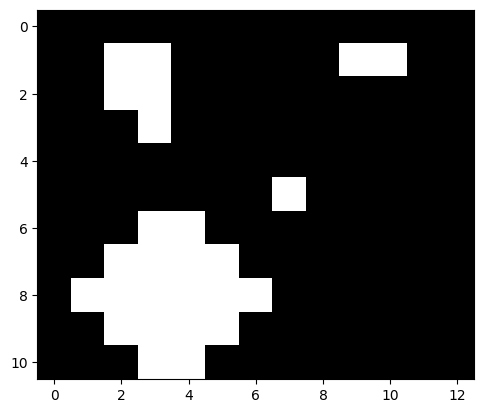

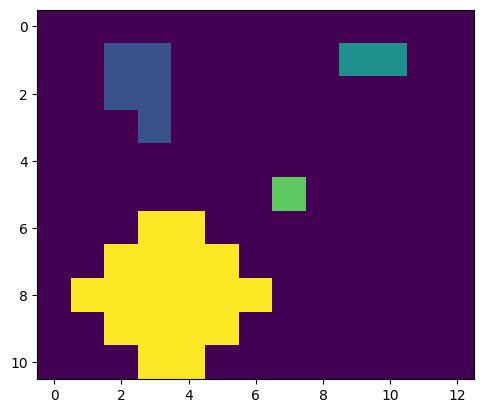

In [12]:
plt.figure()
plt.imshow(manual_mask, cmap='gray')
plt.show()

plt.figure()
plt.imshow(starplane)
plt.show()

In [2]:
deepd3_path = 'DeepD3_32F.h5'
life_act_path = 'Data/LifeAct/0317_A1_Composite.tif'

movie_index = 0
life_act = load_life_act(life_act_path, movie_index=movie_index)

deepd3_scale = (512, 512)
life_act_threshold = 200
pred_thresh = 0.2

starplane, labels_roi = locate_spines_deepd3(deepd3_path, life_act_path, deepd3_scale, 
                                             life_act_threshold, pred_thresh, movie_index)

plt.figure(dpi=200)
plt.imshow(starplane >= 0, cmap='magma')
plt.imshow(life_act, cmap='viridis', alpha=0.5)
plt.show()

Exception: Issues with path: Data/LifeAct/0317_A1_Composite.tif, could not load movie

-1 45
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


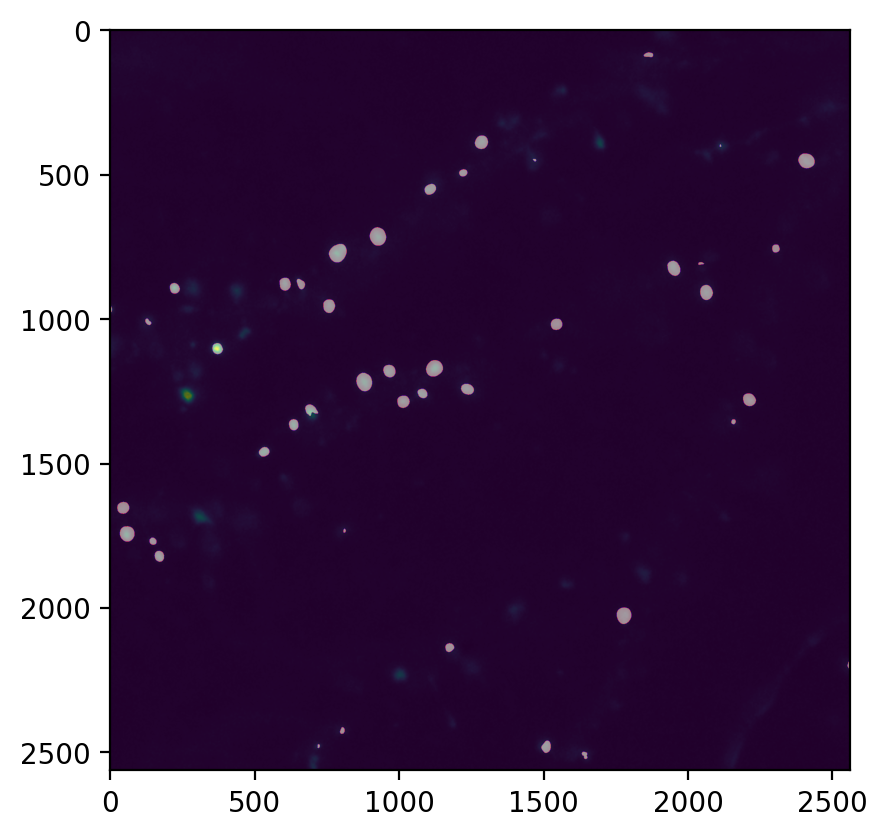

In [41]:
# Example of using custom boolean spine map
print(np.min(starplane), np.max(starplane))
star_mask = starplane.copy()
star_mask[np.where(star_mask > -1)] = 1
star_mask = (star_mask + 1) / 2

starplane_manual, labels_roi_manual = locate_spines_manual(star_mask)

plt.figure(dpi=200)
plt.imshow(starplane_manual >= 0, cmap='magma')
plt.imshow(life_act, cmap='viridis', alpha=0.5)
plt.show()

In [3]:
output_dir = '../Outputs/'
filename = 'A1_spines'
save_spine_data(starplane, labels_roi, output_dir, filename)

Spine data saved successfully.
Starplane file: ../Outputs/A1_spines_starplane.npy
Labels ROI file: ../Outputs/A1_spines_labels_roi.json


Processing 0317_A1_Composite.tif...
1/1 [==============================] - 0s 316ms/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


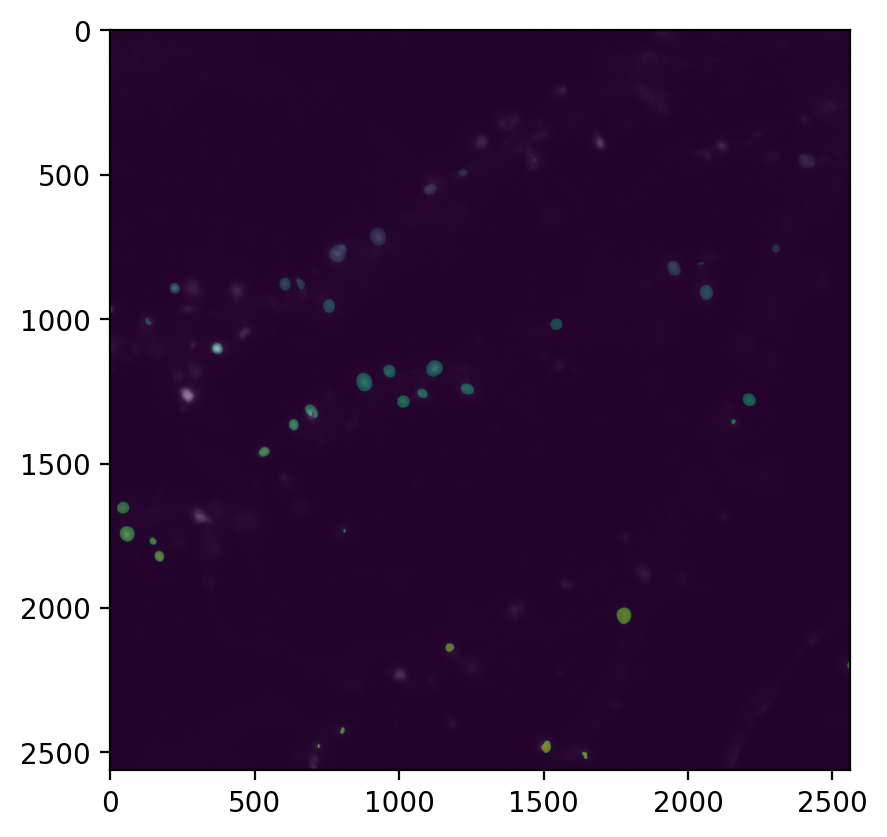

Spine data saved successfully.
Starplane file: Data/Spines\0317_A1_spines_starplane.npy
Labels ROI file: Data/Spines\0317_A1_spines_labels_roi.json
Processing 0317_B2_Composite.tif...
1/1 [==============================] - 0s 323ms/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


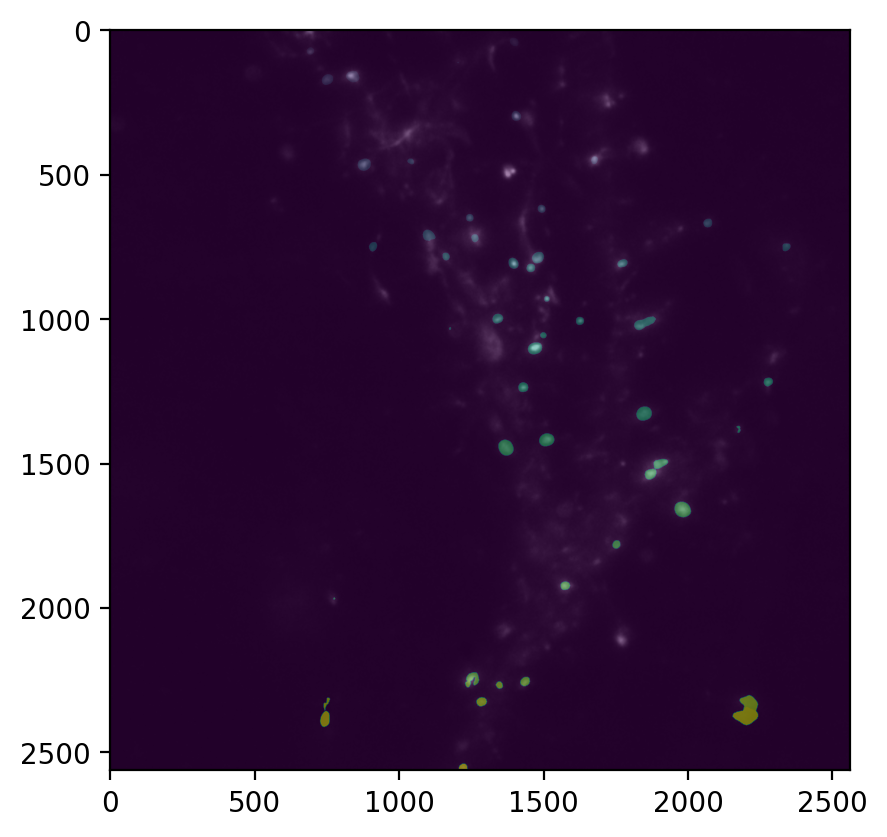

Spine data saved successfully.
Starplane file: Data/Spines\0317_B2_spines_starplane.npy
Labels ROI file: Data/Spines\0317_B2_spines_labels_roi.json
Processing 0317_B3_Composite.tif...
1/1 [==============================] - 0s 315ms/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


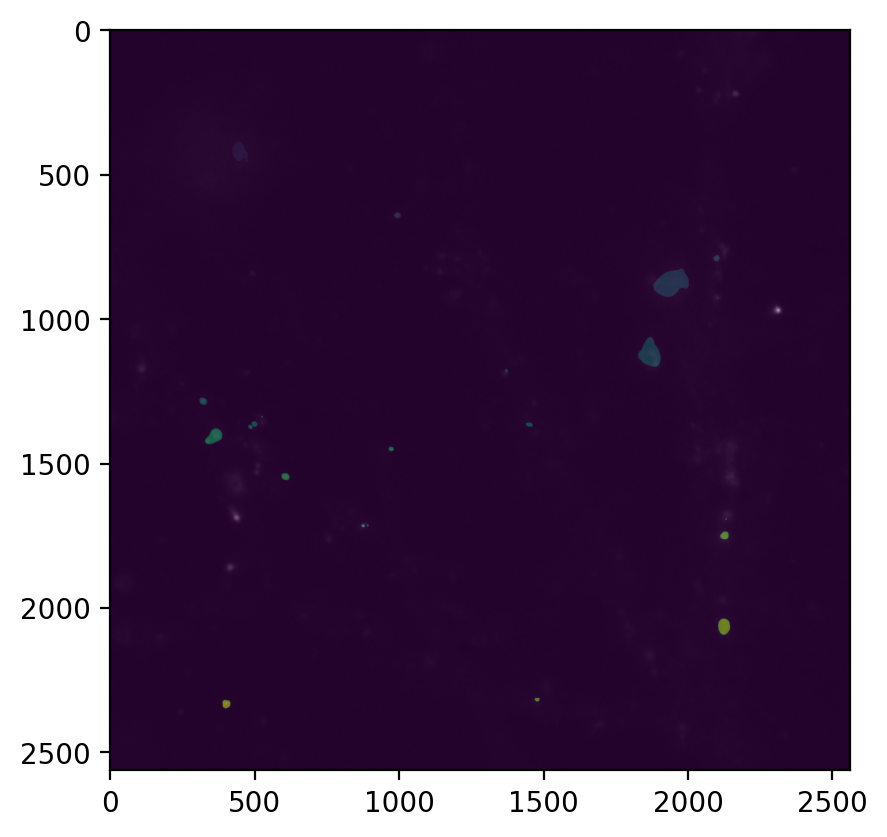

Spine data saved successfully.
Starplane file: Data/Spines\0317_B3_spines_starplane.npy
Labels ROI file: Data/Spines\0317_B3_spines_labels_roi.json
Processing 0317_C1_Composite.tif...
1/1 [==============================] - 0s 317ms/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


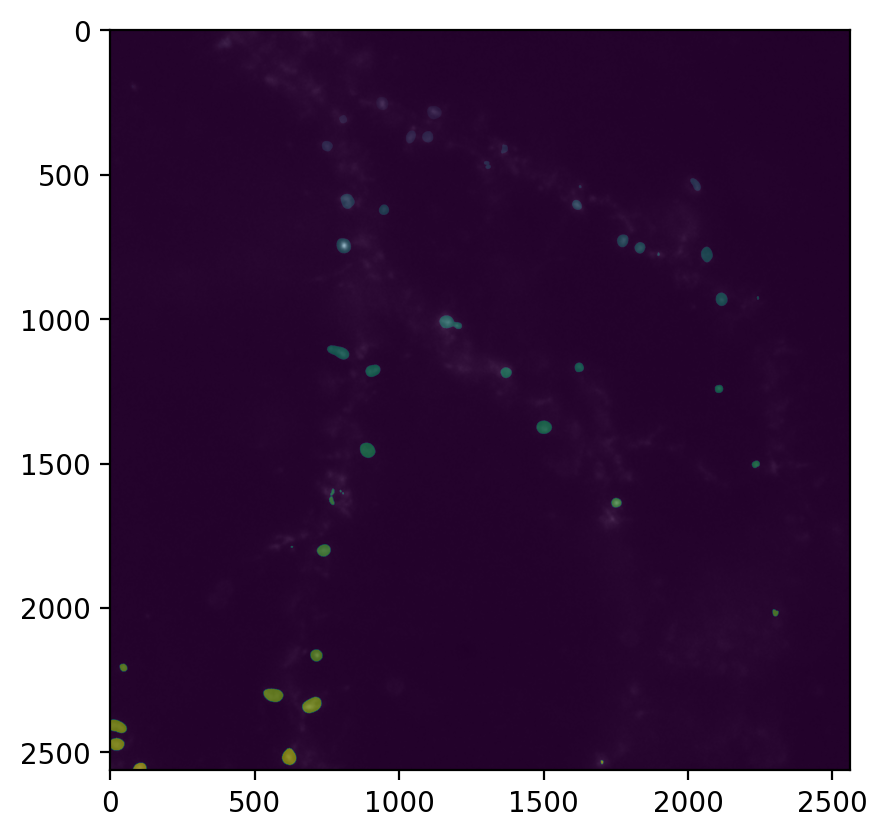

Spine data saved successfully.
Starplane file: Data/Spines\0317_C1_spines_starplane.npy
Labels ROI file: Data/Spines\0317_C1_spines_labels_roi.json
Processing 0317_D1_Composite.tif...
1/1 [==============================] - 0s 319ms/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


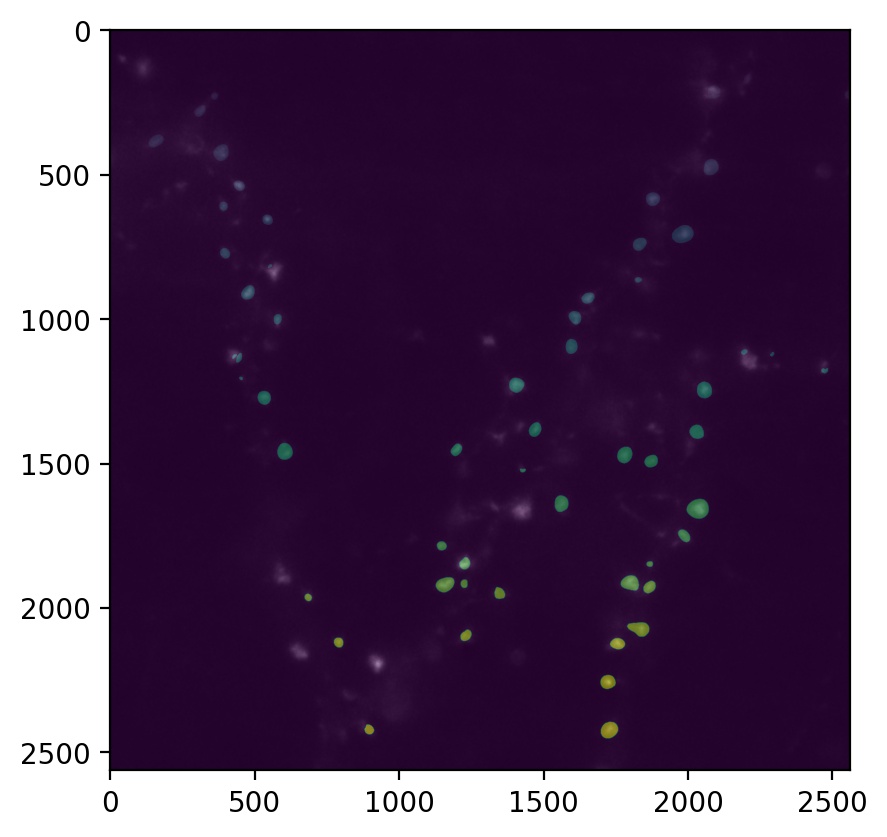

Spine data saved successfully.
Starplane file: Data/Spines\0317_D1_spines_starplane.npy
Labels ROI file: Data/Spines\0317_D1_spines_labels_roi.json
Processing 0317_D2_Composite.tif...
1/1 [==============================] - 0s 321ms/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


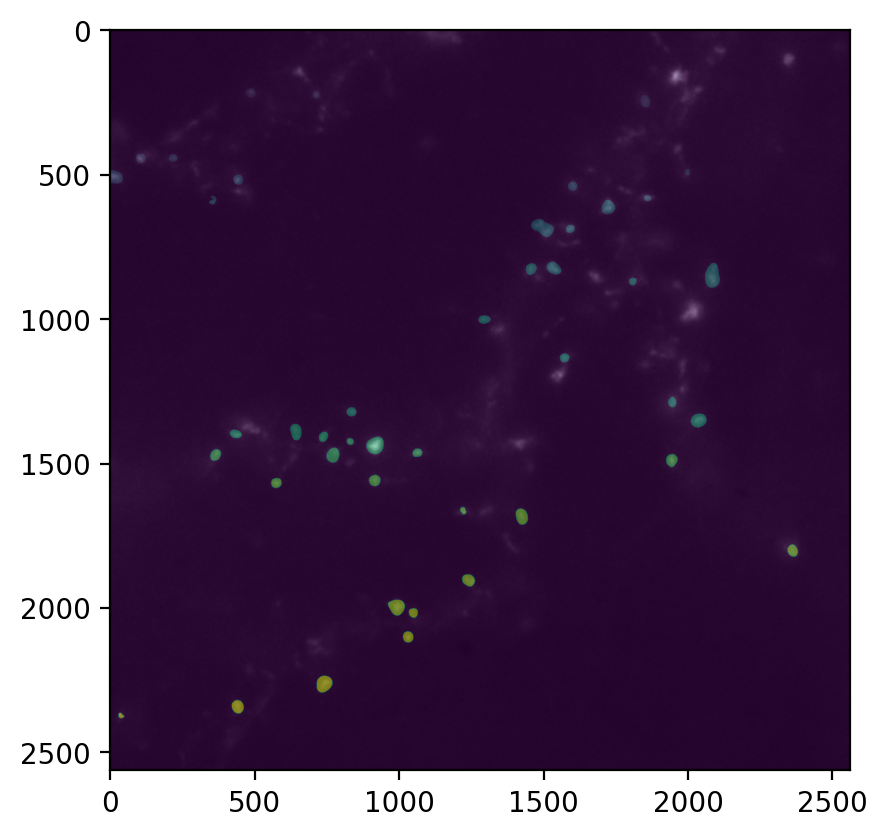

Spine data saved successfully.
Starplane file: Data/Spines\0317_D2_spines_starplane.npy
Labels ROI file: Data/Spines\0317_D2_spines_labels_roi.json
Processing 0522_A1_Composite.tif...
1/1 [==============================] - 0s 317ms/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


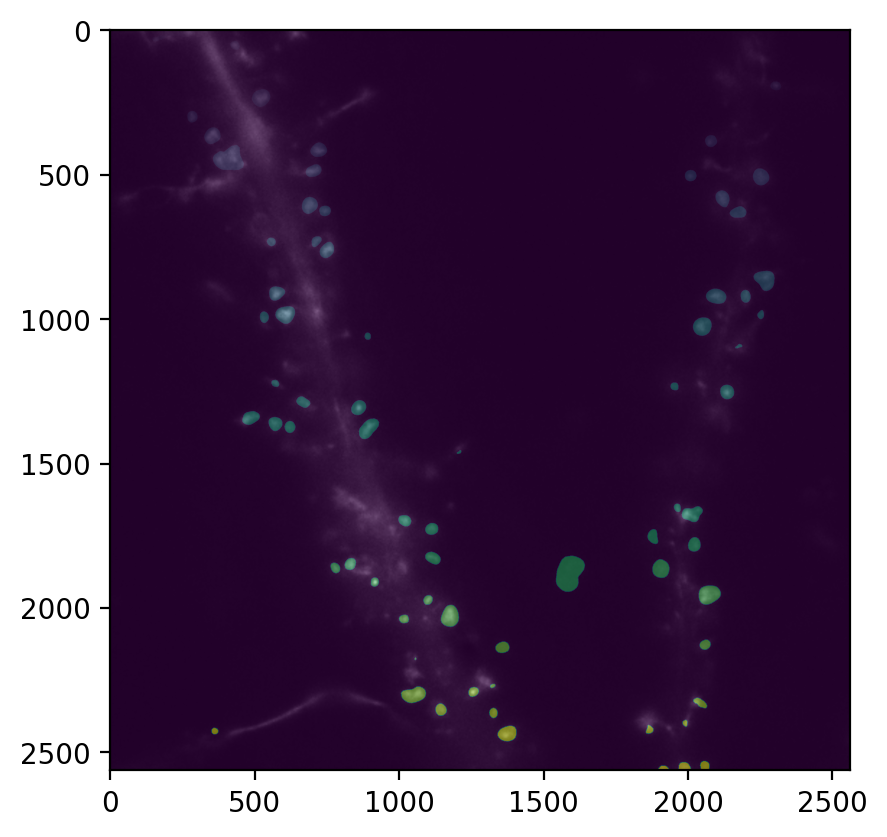

Spine data saved successfully.
Starplane file: Data/Spines\0522_A1_spines_starplane.npy
Labels ROI file: Data/Spines\0522_A1_spines_labels_roi.json
Processing 0522_B1_Composite.tif...
1/1 [==============================] - 0s 322ms/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


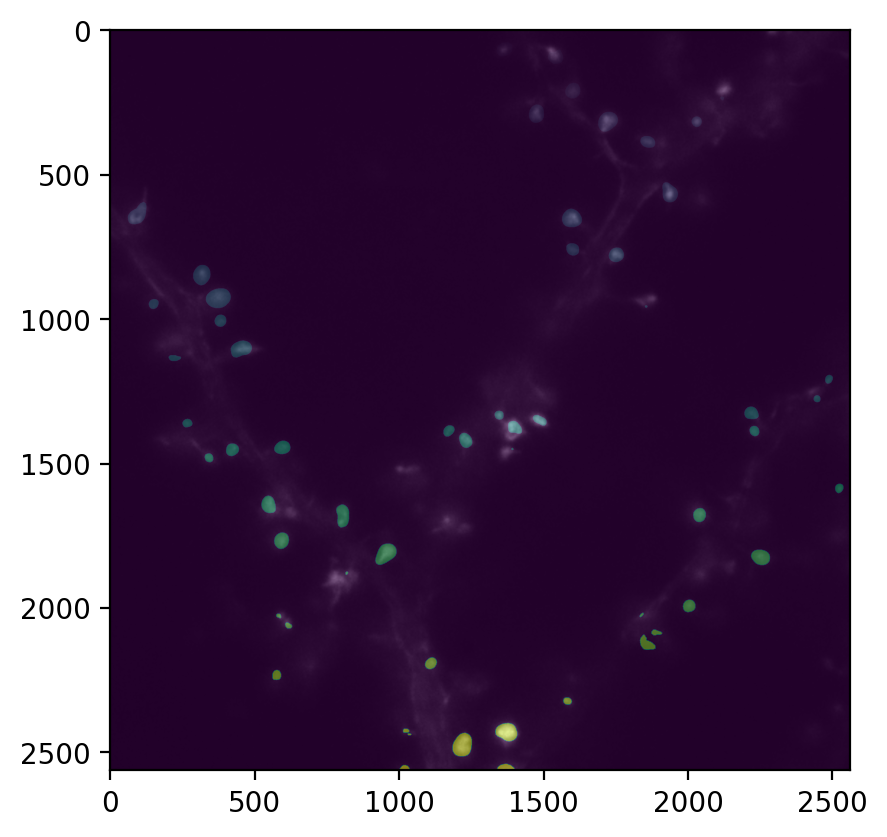

Spine data saved successfully.
Starplane file: Data/Spines\0522_B1_spines_starplane.npy
Labels ROI file: Data/Spines\0522_B1_spines_labels_roi.json
Processing 0522_B2_Composite.tif...
1/1 [==============================] - 0s 325ms/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


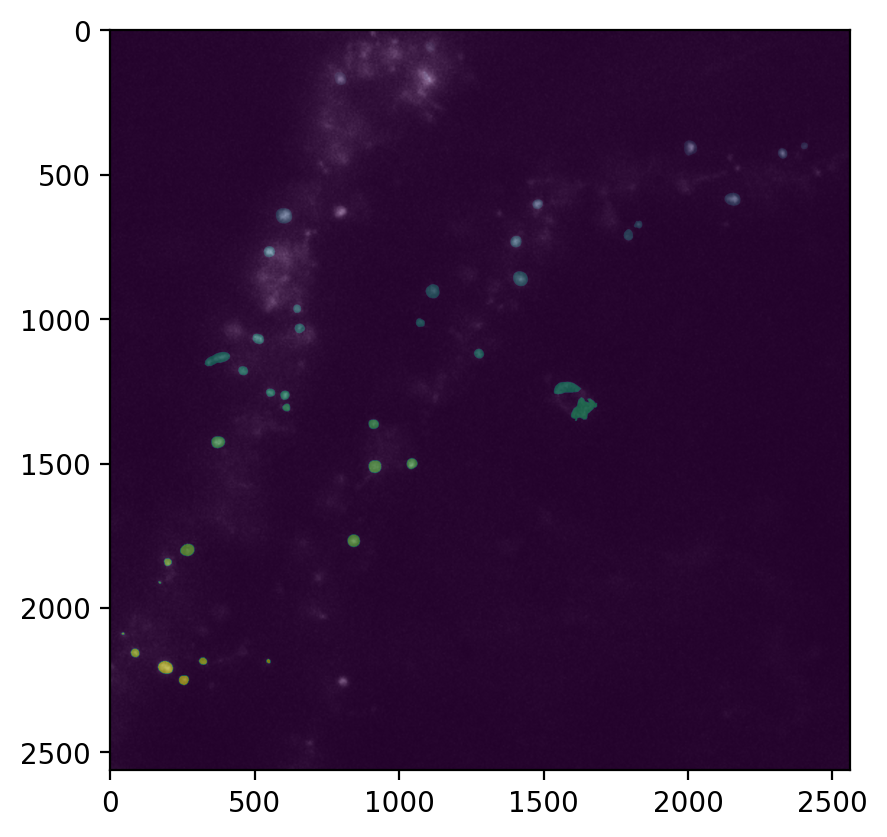

Spine data saved successfully.
Starplane file: Data/Spines\0522_B2_spines_starplane.npy
Labels ROI file: Data/Spines\0522_B2_spines_labels_roi.json
Processing 1027_A1_Composite.tif...
1/1 [==============================] - 0s 322ms/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


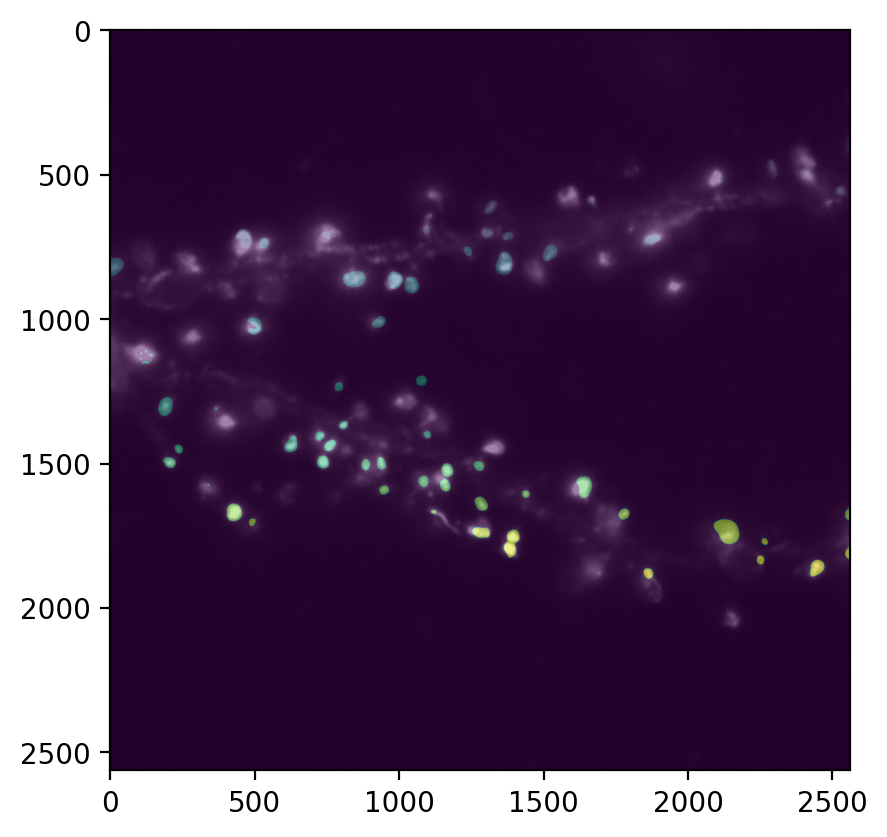

Spine data saved successfully.
Starplane file: Data/Spines\1027_A1_spines_starplane.npy
Labels ROI file: Data/Spines\1027_A1_spines_labels_roi.json
Processing 1123_B1_Composite.tif...
1/1 [==============================] - 0s 326ms/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


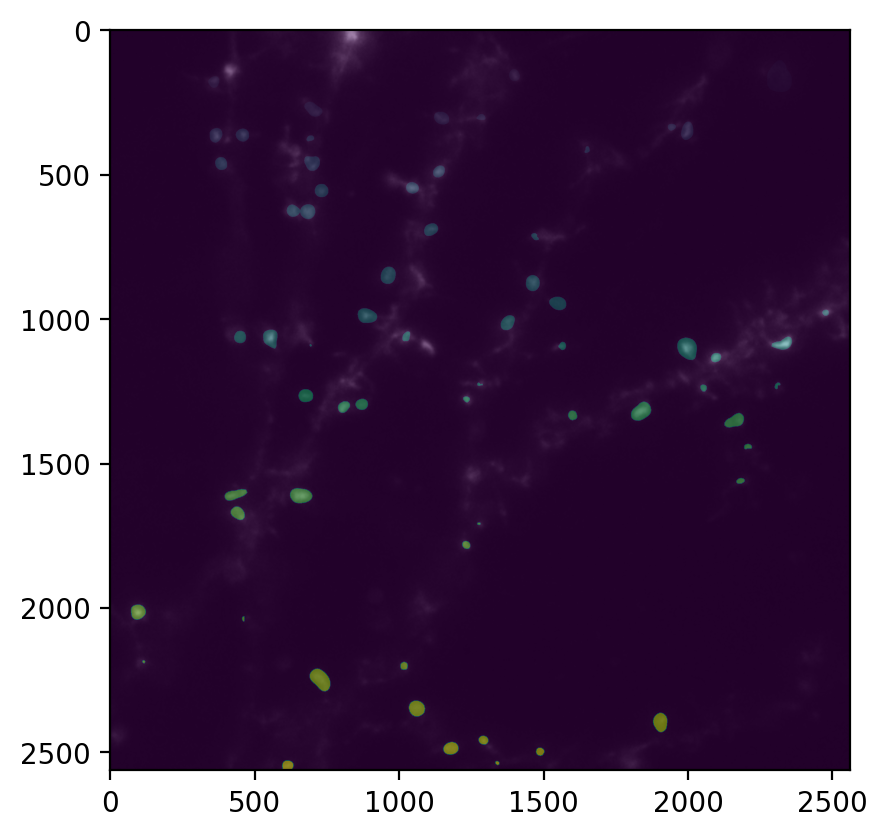

Spine data saved successfully.
Starplane file: Data/Spines\1123_B1_spines_starplane.npy
Labels ROI file: Data/Spines\1123_B1_spines_labels_roi.json
Processing 1123_B2_Composite.tif...
1/1 [==============================] - 0s 319ms/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


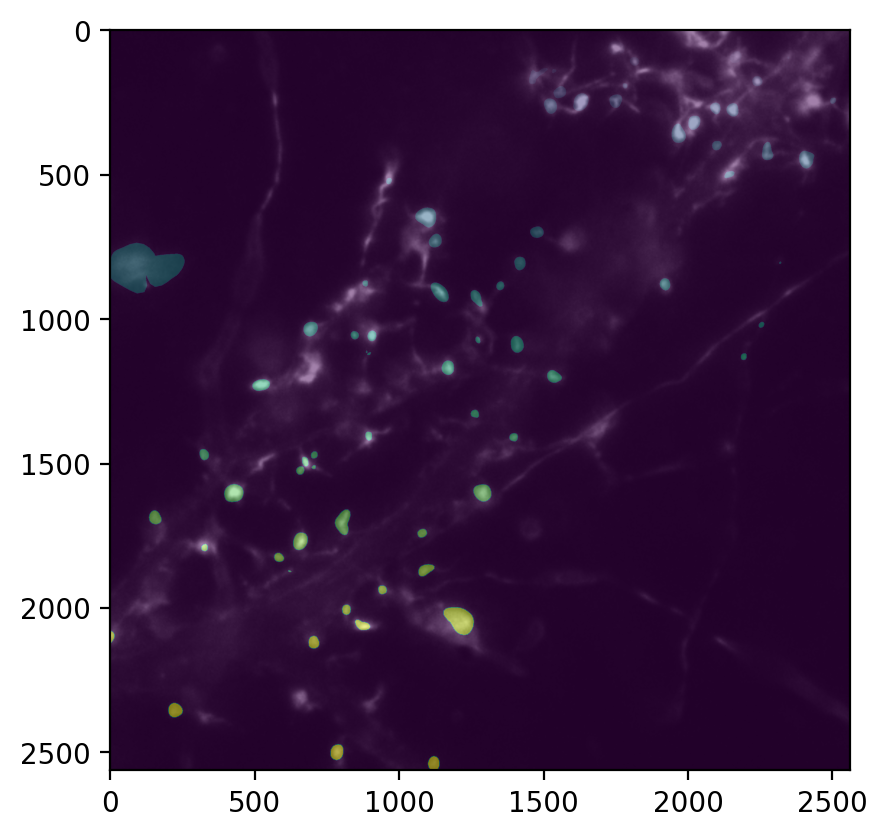

Spine data saved successfully.
Starplane file: Data/Spines\1123_B2_spines_starplane.npy
Labels ROI file: Data/Spines\1123_B2_spines_labels_roi.json
Processing 1218_A1_Composite.tif...
1/1 [==============================] - 0s 315ms/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


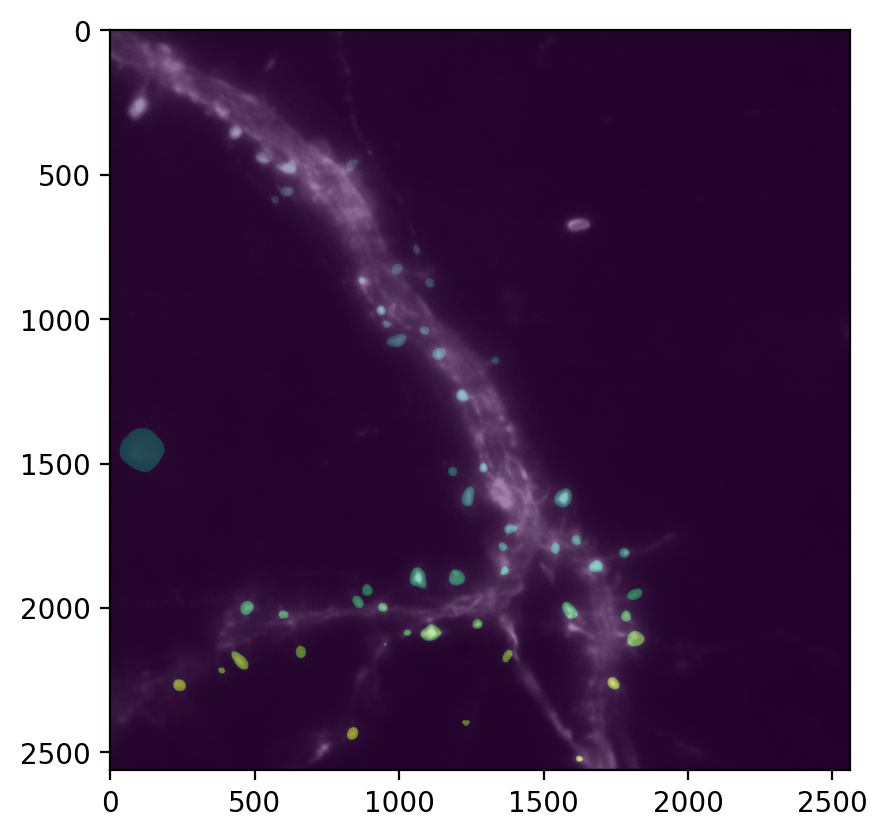

Spine data saved successfully.
Starplane file: Data/Spines\1218_A1_spines_starplane.npy
Labels ROI file: Data/Spines\1218_A1_spines_labels_roi.json
Processing complete.


In [3]:
deepd3_path = 'DeepD3_32F.h5'
deepd3_scale = (512, 512)
life_act_threshold = 200
pred_thresh = 0.2
movie_index = 0
input_dir = 'Data/LifeAct'
output_dir = 'Data/Spines'

# Get a list of all the composite files in the "Composites" folder
composite_files = [file for file in os.listdir(input_dir) if file.endswith('Composite.tif')]

for composite_file in composite_files:
    print(f"Processing {composite_file}...")
    
    life_act_path = os.path.join(input_dir, composite_file)
    life_act = load_life_act(life_act_path, movie_index)

    # Extract the base filename without the '_Composite.tif' suffix
    base_filename = composite_file[:-14]
    
    starplane, labels_roi = locate_spines(deepd3_path, life_act_path, deepd3_scale,
                                          life_act_threshold, pred_thresh, life_act_movie_index=movie_index)
    
    plt.figure(dpi=200)
    plt.imshow(life_act, cmap='gray')
    plt.imshow(starplane, alpha=0.5)
    plt.show()

    # Construct the filenames for the starplane and labels_roi files
    starplane_filename = f"{base_filename}_spines_starplane.npy"
    labels_roi_filename = f"{base_filename}_spines_labels_roi.json"
    
    save_spine_data(starplane, labels_roi, output_dir, base_filename + '_spines')
    
print("Processing complete.")